# 🧠 Task 3: Customer Segmentation Using Clustering

## 🎯 Objective
Segment customers based on purchasing behavior using clustering techniques for targeted marketing strategies.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('customer_data.csv')
df.head()

,Customer ID,Age,Annual Income,Spending Score
0,1000,56.0,44855.0,58.0
1,1001,69.0,76434.0,39.0
2,1002,46.0,87694.0,14.0
3,1003,32.0,58016.0,95.0
4,1004,60.0,22400.0,5.0


In [7]:
# Inspect dataset
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nSummary Statistics:\n", df.describe())

Shape: (305, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     305 non-null    int64  
 1   Age             285 non-null    float64
 2   Annual Income   285 non-null    float64
 3   Spending Score  285 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.7 KB
None

Missing Values:
 Customer ID        0
Age               20
Annual Income     20
Spending Score    20
dtype: int64

Duplicates: 5

Summary Statistics:
        Customer ID         Age  Annual Income  Spending Score
count   305.000000  285.000000     285.000000      285.000000
mean   1149.878689   43.536842   56979.442105       49.431579
std      86.850683   15.245972   24293.732447       29.030091
min    1000.000000   18.000000   15301.000000        1.000000
25%    1075.000000   31.000000   34830.000000       25.000000
50%    1151.000000   44.

In [8]:
# Select features and scale
X = df[['Age', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

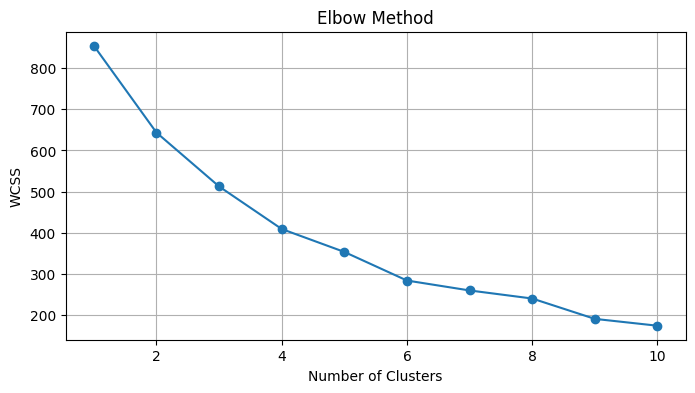

In [9]:
# Elbow Method

# Handle NaNs
X_scaled = np.nan_to_num(X_scaled)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [10]:
# Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for {k} clusters: {score:.3f}")

Silhouette Score for 2 clusters: 0.240
Silhouette Score for 3 clusters: 0.247
Silhouette Score for 4 clusters: 0.264
Silhouette Score for 5 clusters: 0.262
Silhouette Score for 6 clusters: 0.298
Silhouette Score for 7 clusters: 0.283
Silhouette Score for 8 clusters: 0.288
Silhouette Score for 9 clusters: 0.325
Silhouette Score for 10 clusters: 0.326


In [11]:
# Apply KMeans with optimal k
optimal_k = 5  # Change based on Elbow Method output
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

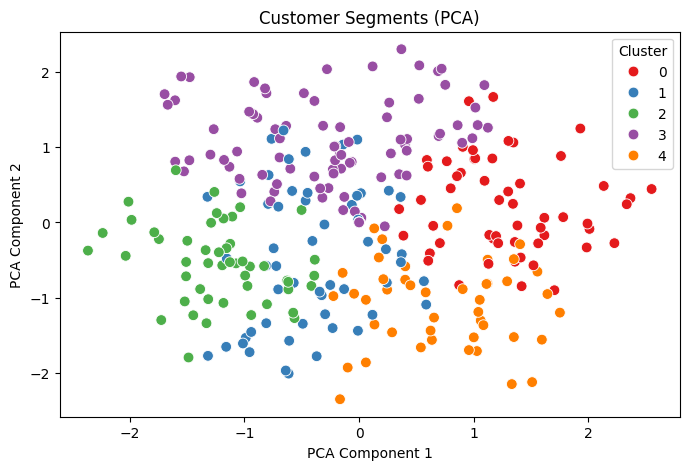

In [12]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=60)
plt.title("Customer Segments (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

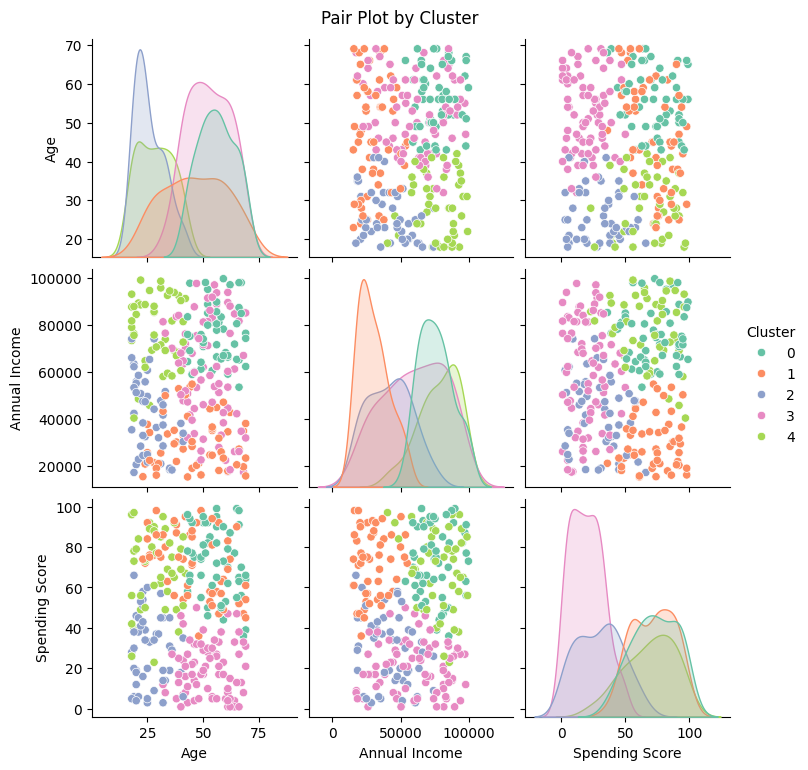

In [13]:
# Pair Plot
sns.pairplot(df, vars=['Age', 'Annual Income', 'Spending Score'], hue='Cluster', palette='Set2')
plt.suptitle("Pair Plot by Cluster", y=1.02)
plt.show()

In [14]:
# Save the final dataset
df.to_csv("customer_clustered.csv", index=False)

## 📌 Insights & Recommendations:
- **Cluster 0**: High Income & High Spending → Premium offers and loyalty programs.
- **Cluster 1**: Young & Moderate Income → Youth-oriented marketing.
- **Cluster 2**: Low Spending → Consider low-risk retention.
- **Cluster 3**: High Income, Low Spending → Promote exclusive, value-driven deals.
- **Cluster 4**: Mid-income, high engagement → Maintain via customer rewards.